In [1]:
import numpy as np 
import random as rn  
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 

def vdw(V,R,T,a,b):
    return R*T/(V-b)-a/(V*V) 

a=1.37;b=0.0387;R=0.08314462;   # parameters for O2 and gas constant


 Use polynomials from 1 to  7
Full data R^2 values  [0.63812187 0.81745112 0.83459471 0.84173159 0.8453742  0.84558143
 0.84581274]
Full data sum |y-yfit|^2 values  [292.27054652 147.43543617 133.58943032 127.82534149 124.88338382
 124.71601809 124.52920047]


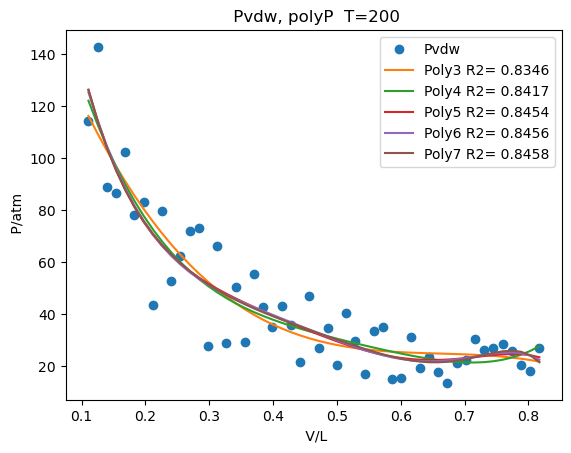

In [5]:
rn.seed(a=666)
Pmax=150  # max Pressure
T=200     # Temp  
N=50
# for T in [200,300,400]:
Vmin=R*T/Pmax
Vmax=R*T/20.  # Volume at 20 atm
dV=(Vmax-Vmin)/float(N)
PV=[]
PvdwV=[]
VV=[]
#----------------------------------
rnscale=0.9   # was 0.6 
#----------------------------------
for i in range(N):
  V=Vmin+i*dV   
  P=R*T/V                              # ideal gas 
  Pvdw=vdw(V,R,T,a,b)*(1.0+rnscale*(rn.random()-0.5))  # van der Waals pressure + noise
  VV.append(V)                         # vector of Volume
  PV.append(P)                         # vector of Pressure 
  PvdwV.append(Pvdw)                   # P(vdw) vector

#----------------------------------
NP=7  # max order of the poly
#----------------------------------
Leave_one_out=False

if Leave_one_out:
  P_train, P_test, V_train, V_test = train_test_split(PvdwV,VV,test_size=0.01)
  N_tr=len(V_train)
  N_te=len(V_test)
  print(' Leave one out ',N_tr,N_te,V_test)
else:
  N_tr=N   # full data 
  V_train=VV
  P_train=PvdwV  # noisy vdw data 
  
p_c=np.zeros((NP,NP+1))
print(' Use polynomials from 1 to ',NP)
for i in range(NP):   # polynoms from 1 to NP
  p_c[i,0:i+2]=np.polyfit(V_train,P_train,i+1,full=False)  # fit a poly to Pvdw
#  print('Polynomial coeff ',p_c[i,0:i+2])

y=np.zeros((NP,N_tr))
for i in range(NP):
  poly2=np.poly1d(p_c[i,0:i+2])
  y[i,:]=poly2(V_train)  # y contain the poly fit data

yave=np.sum(P_train)/N_tr # train data
r2sk=np.zeros(NP)
rb=np.zeros(NP)
for i in range(NP):
  rb[i]=np.sum((y[i,:]-P_train[:])**2)/N 
  r2sk[i]=r2_score(P_train,y[i,:])

print('Full data R^2 values ',r2sk[0:NP])
print('Full data sum |y-yfit|^2 values ',rb[0:NP])

plt.title(" Pvdw, polyP  T=200")
plt.ylabel(" P/atm")
plt.plot(VV,PvdwV,'o',label='Pvdw')
for i in range(2,NP):
  R2lab = 'Poly'+str(i+1)+'  R2= {: >6.4f}'.format(r2sk[i])
  if Leave_one_out: 
    plt.plot(V_train,y[i],'+',label=R2lab)
  else:
    plt.plot(V_train,y[i],label=R2lab)
plt.xlabel(" V/L")
plt.legend()
plt.show()


Validation training point  35  test points  15  iteration   100


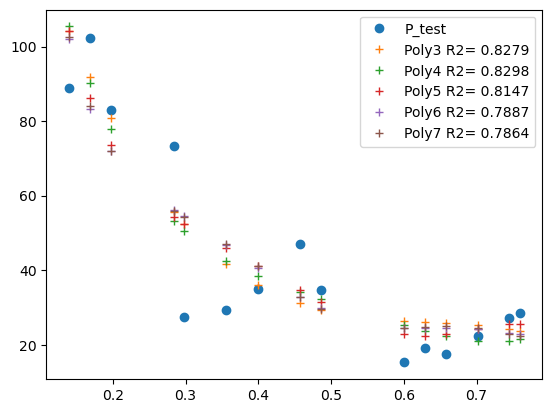

Validat average poly 1 - 7 : R2 values  [0.52591035 0.73266722 0.74410654 0.74341028 0.72933788 0.70594779
 0.6605303 ]
Validat average poly 1 - 7 :  sum |y-yfit|^2 values  [358.35885361 197.00066855 187.79874283 187.81476318 201.75231429
 219.71267567 261.85078136]


In [6]:
tes=0.3    #  30 % of the data to test set
P_train, P_test, V_train, V_test = train_test_split(PvdwV,VV,test_size=tes)
N_tr=len(V_train)
N_te=len(V_test)
Nval=100  # num of validation cycles
#print('V_test',V_test)
#print('P_test',P_test)
print('Validation training point ',N_tr,' test points ',N_te,' iteration  ',Nval)
aver2=np.zeros(NP)
averb=np.zeros(NP)

for iv in range(Nval):
  p_c=np.zeros((NP,NP+1))
  for i in range(NP):   # polynoms from 1 to NP
    p_c[i,0:i+2]=np.polyfit(V_train,P_train,i+1,full=False)
#   print('Polynomial coeff ',p_c[i,0:i+2])

  y=np.zeros((NP,N_te))
  for i in range(NP):
    poly2=np.poly1d(p_c[i,0:i+2])
    y[i,:]=poly2(V_test)

  r2=np.zeros(NP)
  rb=np.zeros(NP)
  for i in range(NP):
    r2[i]=r2_score(P_test,y[i,:])       # R2 over test-set
    rb[i]=np.sum((y[i,:]-P_test[:])**2)/N_te  # sum_test-set (y_fit - y_real)**2
    aver2[i]=aver2[i]+r2[i]/float(Nval)   
    averb[i]=averb[i]+rb[i]/float(Nval)   

  if iv == Nval-1: 
#  this will show one test case, the + are the fits in this iteration
     plt.plot(V_test,P_test,'o',label='P_test')
     for i in range(2,NP):
       R2lab = 'Poly'+str(i+1)+' R2= {: >6.4f}'.format(r2[i])
       plt.plot(V_test,y[i],'+',label=R2lab)
     plt.legend()
     plt.show()

  P_train, P_test, V_train, V_test = train_test_split(PvdwV,VV,test_size=tes) # new test and train sets return for iv loop

print('Validat average poly 1 -',NP,': R2 values ',aver2[0:NP])
print('Validat average poly 1 -',NP,':  sum |y-yfit|^2 values ',averb[0:NP])
